# Demo: Displacement Map and Peak Finding Workflow for Ferroelectric Oxies

This notebook demonstrates how to use the `displacement_toolkit` package to:          
- Generate a displacement map from a microscopy image      
- Detect atomic peaks         
- Overlay results for visualization     
- Use a grid fucntion to find hyperparameters          

Requirements: `displacement_toolkit` installed (see README)

Tip for running: I used VS Code and created a folder named: displacement_toolkit as my root directory, with all files in this folder.

B. Import Libraries

In [36]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
from displacement import generate_signed_displacement_map, generate_unsigned_displacement_map, generate_signed_displacement_map
from peaks import find_peaks, fit_lattice, compute_displacements, displacement_field_to_image, parameter_grid
from visualization import overlay_peaks_on_image, show_displacement_map
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C. Load an Image

In [30]:
# Load your own microscopy image
img_path = "./example_images"
img1 = os.path.join(img_path, os.listdir(img_path)[0])
img = Image.open(img1).convert("L")
img_np = np.array(img)

D. Show Raw Image

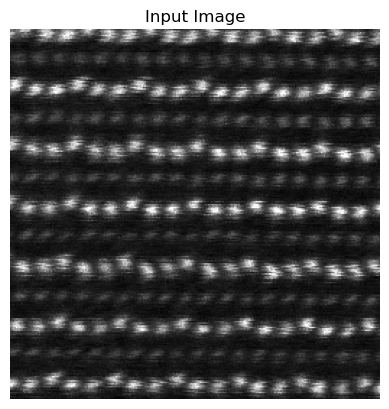

In [31]:
plt.imshow(img_np, cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

E. Generate Displacement Map 

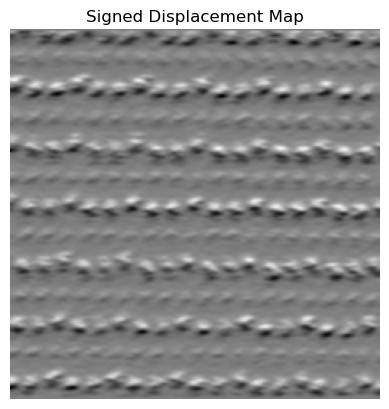

In [32]:
disp_map = generate_signed_displacement_map(img_np)
show_displacement_map(disp_map, title="Signed Displacement Map")

F. Find Peaks 

Found 212 peaks.


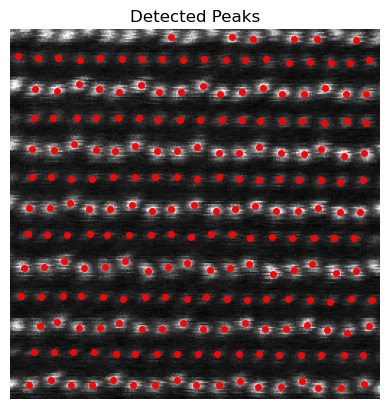

In [33]:
peaks = find_peaks(img_np, sigma=1, min_distance=5, threshold_abs=30)
print(f"Found {len(peaks)} peaks.")
overlay_peaks_on_image(img_np, peaks, title="Detected Peaks")

G. Lattice Fit and Displacement Field 

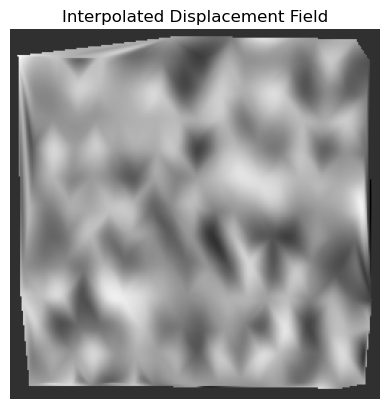

In [34]:
i, j, lattice_func = fit_lattice(peaks, img_np.shape)
if lattice_func is not None:
    displacements = compute_displacements(peaks, i, j, lattice_func)
    disp_img = displacement_field_to_image(peaks, displacements, img_np.shape)
    show_displacement_map(disp_img, title="Interpolated Displacement Field")
else:
    print("Lattice fit failed (not enough peaks?)")

H. Try Parameter Grid 

Too many parameter sets (12). Showing first 6.


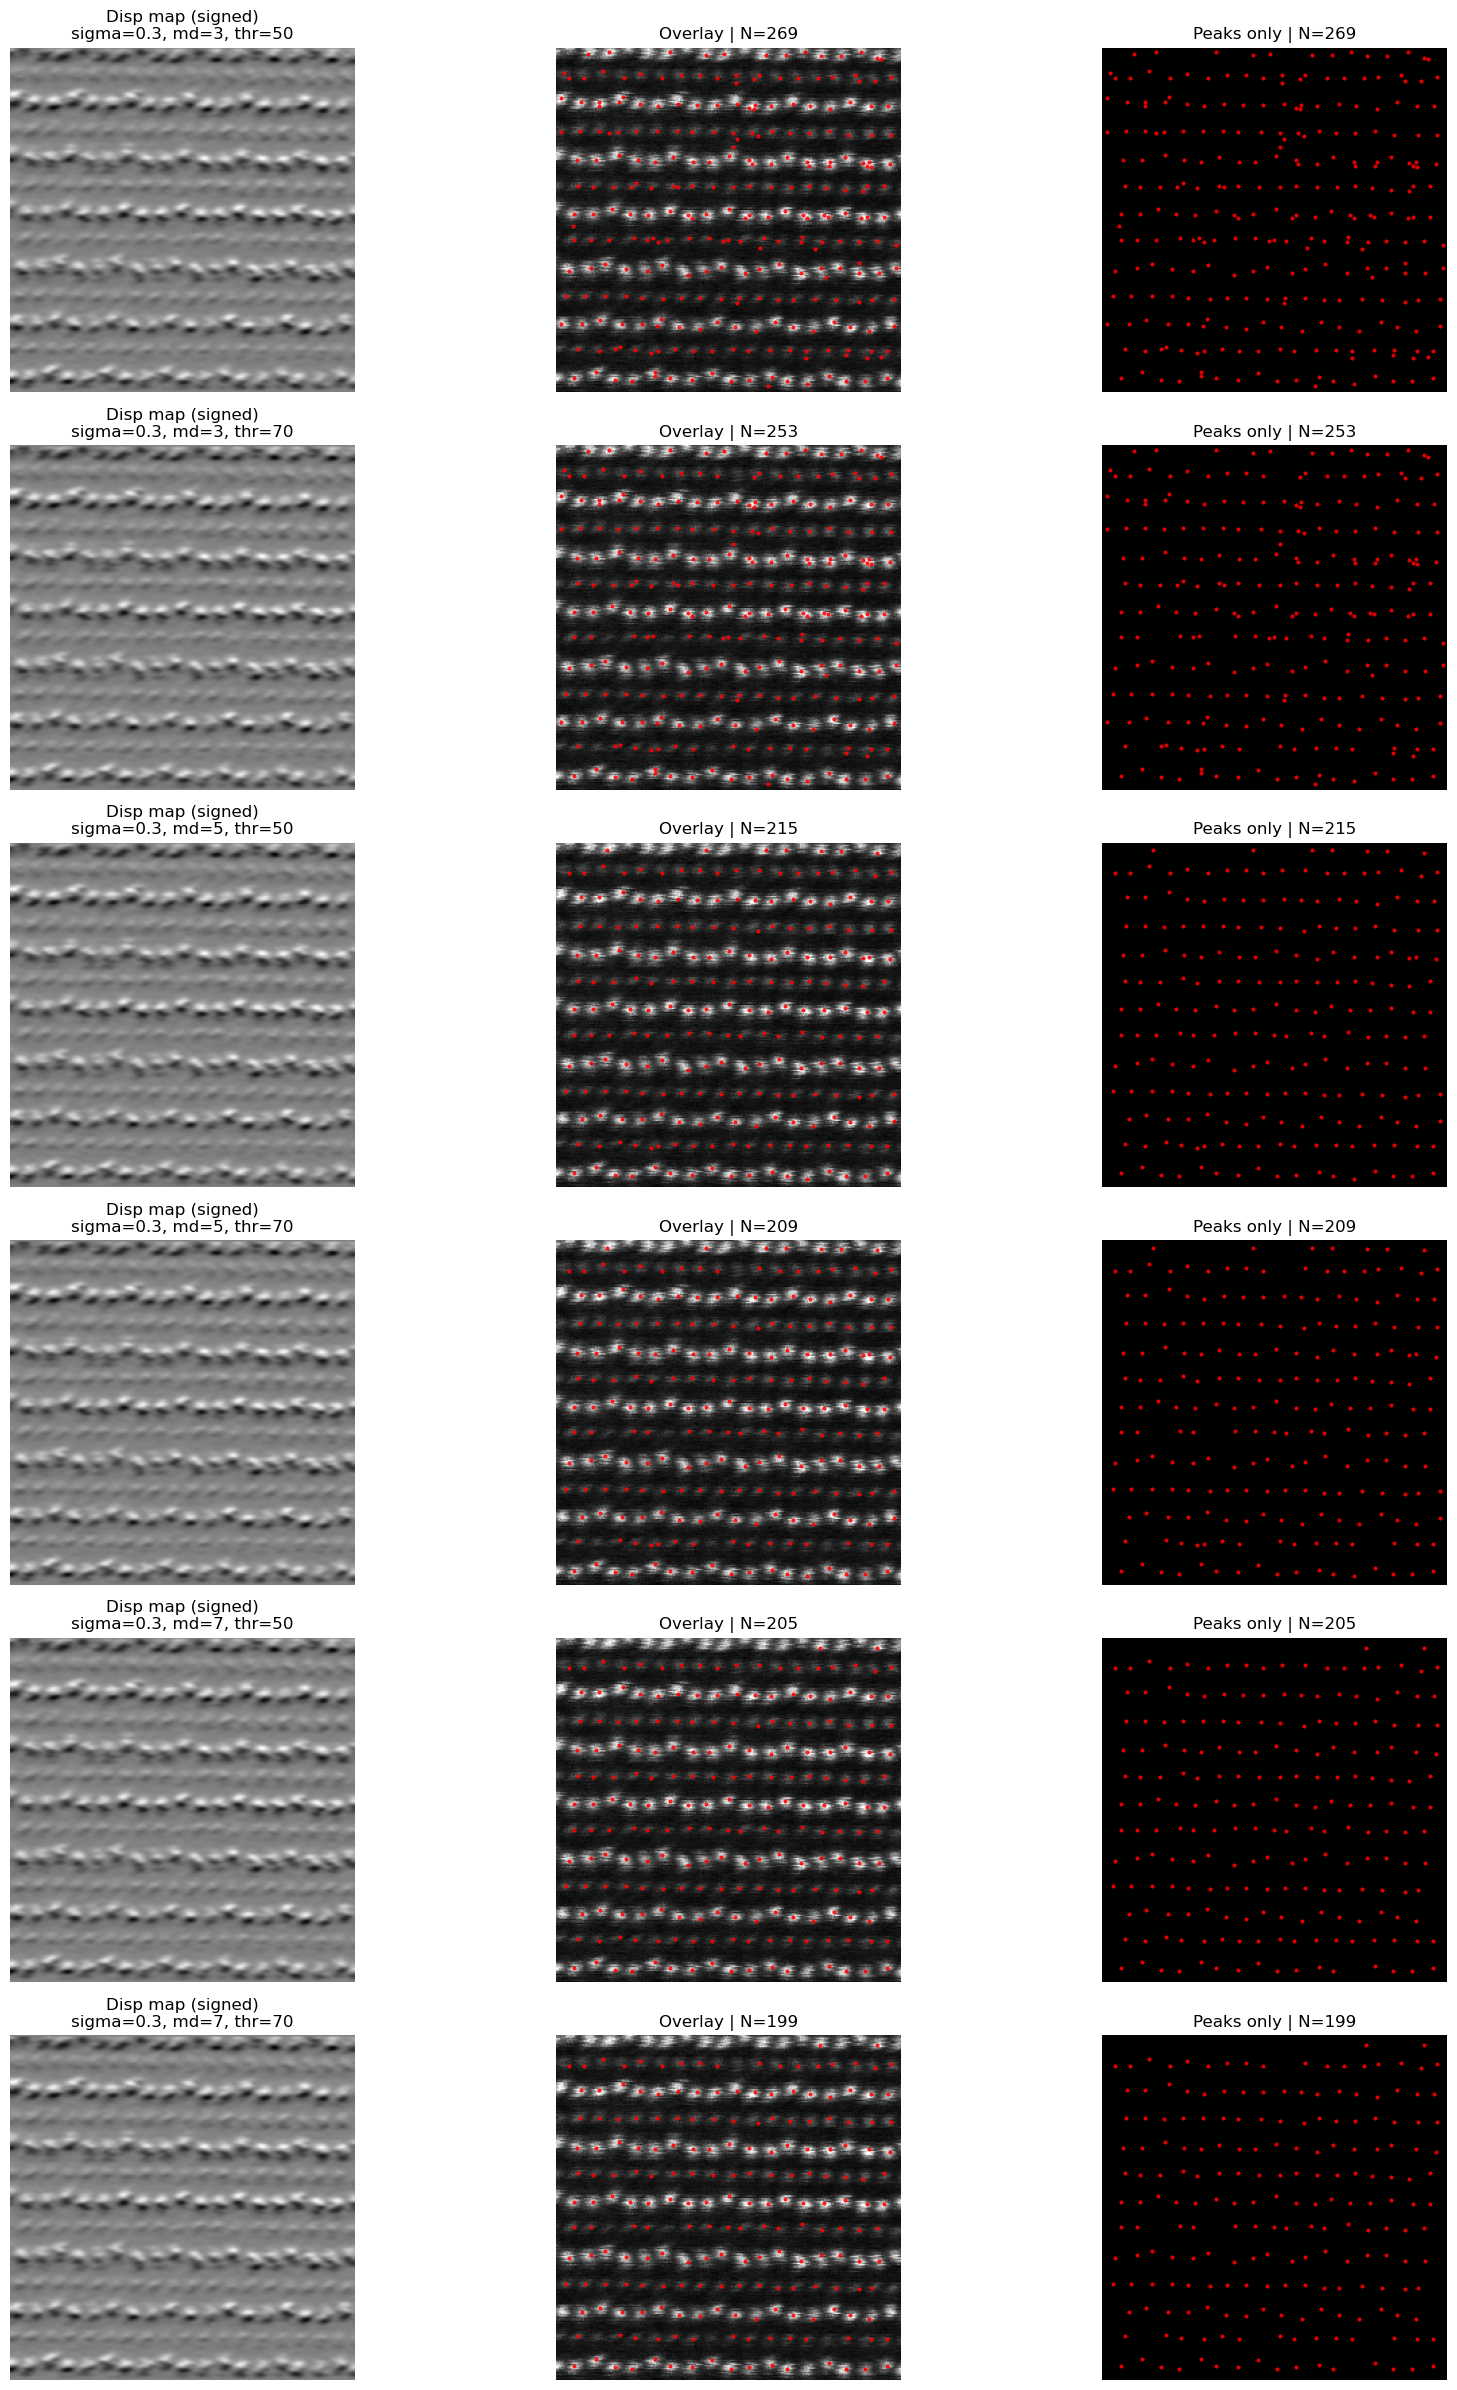

In [38]:
parameter_grid(
    img1,
    sigmas=[0.3, 2],
    min_distances=[3, 5, 7],
    thresholds=[50, 70],
    blur_ksize=(5,5),
    sobel_ksize=5,
    max_plots=6,
)
